In [1]:
import geopandas as gpd
import fiona
# help(fiona.open)
import matplotlib.pyplot as plt
%matplotlib inline

# geo pandas
# http://geopandas.org/mapping.html#chloropleth-maps
# under the hood: https://github.com/geopandas/geopandas/blob/master/examples/choropleths.ipynb


# need to update data & potentially antomated & upload to server
# https://gist.github.com/wilsaj/862153
# https://gist.github.com/rduplain/1641344
# https://matplotlib.org/faq/howto_faq.html

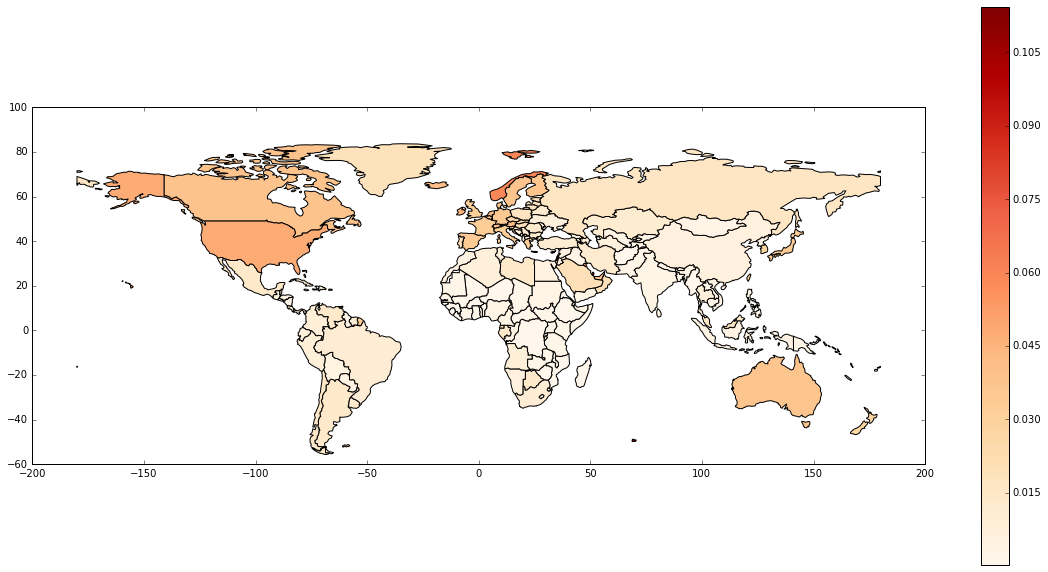

In [6]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world

# Plot by GDP per capta
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est


# world


world.plot(column='gdp_per_cap',figsize=(20,10),cmap='OrRd',legend = True)
# delete axis later

plt.show()


In [ ]:
# can join


# # One GeoDataFrame of countries, one of Cities.
# # Want to merge so we can get each city's country.
# In [11]: countries.head()
# Out[11]: 
#                                             geometry               country
# 0  POLYGON ((61.21081709172574 35.65007233330923,...           Afghanistan
# 1  (POLYGON ((16.32652835456705 -5.87747039146621...                Angola
# 2  POLYGON ((20.59024743010491 41.85540416113361,...               Albania
# 3  POLYGON ((51.57951867046327 24.24549713795111,...  United Arab Emirates
# 4  (POLYGON ((-65.50000000000003 -55.199999999999...             Argentina

# In [12]: cities.head()
# Out[12]: 
#            name                                     geometry
# 0  Vatican City  POINT (12.45338654497177 41.90328217996012)
# 1    San Marino    POINT (12.44177015780014 43.936095834768)
# 2         Vaduz  POINT (9.516669472907267 47.13372377429357)
# 3    Luxembourg  POINT (6.130002806227083 49.61166037912108)
# 4       Palikir  POINT (158.1499743237623 6.916643696007725)

# # Execute spatial join
# In [13]: cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')

# In [14]: cities_with_country.head()
# Out[14]: 
#              name                                     geometry  index_right  \
# 0    Vatican City  POINT (12.45338654497177 41.90328217996012)           79   
# 1      San Marino    POINT (12.44177015780014 43.936095834768)           79   
# 192          Rome    POINT (12.481312562874 41.89790148509894)           79   
# 2           Vaduz  POINT (9.516669472907267 47.13372377429357)            9   
# 184        Vienna  POINT (16.36469309674374 48.20196113681686)            9   

#      country  
# 0      Italy  
# 1      Italy  
# 192    Italy  
# 2    Austria  
# 184  Austria  

In [20]:
from bokeh.plotting import *
from bokeh.resources import INLINE

In [22]:
from collections import OrderedDict

from bokeh._legacy_charts import Area, show, output_file

# create some example data
xyvalues = OrderedDict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    jython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)

# output_file(filename="area.html")
output_notebook() 

area = Area(
    xyvalues, title="Responsive Area Chart",
    xlabel='time', ylabel='memory',
    stacked=True, legend="top_left",
    responsive=True
)

show(area)

ImportError: No module named 'bokeh._legacy_charts'

In [21]:
from bokeh.charts import Area, show, vplot, output_file, defaults

defaults.width = 400
defaults.height = 400

# create some example data
data = dict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    jython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)

area1 = Area(data, title="Area Chart", legend="top_left",
             xlabel='time', ylabel='memory')

area2 = Area(data, title="Stacked Area Chart", legend="top_left",
             stack=True, xlabel='time', ylabel='memory')

output_notebook() 
# output_file("area.html", title="area.py example")

show(vplot(area1, area2))

Loading BokehJS ...

/Users/Jessie/anaconda/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: bokeh.io.vplot() was deprecated in Bokeh 0.12.0 and will be removed, use bokeh.models.layouts.Column instead.
  warn(message)


In [5]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.tile_providers import STAMEN_TONER


bound = 20000000 # meters
fig = figure(tools='pan, wheel_zoom', x_range=(-bound, bound), y_range=(-bound, bound))
fig.axis.visible = False
fig.add_tile(STAMEN_TONER)
# output_file("stamen_toner_plot.html")
show(fig)

Loading BokehJS ...

In [13]:
# import bokeh.sampledata

AttributeError: module 'bokeh.sampledata' has no attribute 'us_counties'

In [ ]:
# http://bokeh.pydata.org/en/0.11.1/docs/gallery/texas.html
#     this is very good!!!!!!!!!!!!!!!!!!

In [11]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

colors = ["#F1EEF6", "#D4B9DA", "#C994C7", "#DF65B0", "#DD1C77", "#980043"]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
county_colors = [colors[int(rate/3)] for rate in county_rates]

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    color=county_colors,
    name=county_names,
    rate=county_rates,
))

TOOLS="pan,wheel_zoom,box_zoom,reset,hover,save"

p = figure(title="Texas Unemployment 2009", tools=TOOLS)

p.patches('x', 'y', source=source,
          fill_color='color', fill_alpha=0.7,
          line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

output_file("texas.html", title="texas.py example")

show(p)

RuntimeError: bokeh sample data directory does not exist, please execute bokeh.sampledata.download()